In [31]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Exploring univariate Statistics

In [7]:
def calculate_stats_numeric(col):
    count = df[col].count()
    missing = df[col].isnull().sum()
    unique = df[col].nunique()
    dtype = df[col].dtype
    mean = df[col].mean()
    median = df[col].median() 
    mode = df[col].mode().values[0]
    minimum = df[col].min()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    maximum = df[col].max()
    std = df[col].std()
    skew = df[col].skew()
    kurtosis = df[col].kurt()
    return [count, missing, unique, dtype, mean, median, mode,
           minimum, q1, q3, maximum, std, skew, kurtosis]
    
def calculate_stats_categorical(col):
    count = df[col].count()
    missing = df[col].isnull().sum()
    unique = df[col].nunique()
    dtype = df[col].dtype
    mode = df[col].mode().values[0]
    mean = "NA"
    median = "NA" 
    minimum = "NA"
    q1 = "NA"
    q3 = "NA"
    maximum = "NA"
    std = "NA"
    skew = "NA"
    kurtosis = "NA"
    return [count, missing, unique, dtype, mean, median, mode,
           minimum, q1, q3, maximum, std, skew, kurtosis]
    
def univariate_stats(df):
    stats_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Mean', 'Median', 
                                     'Mode', 'Min', 'Q1', 'Q3', 'Max', 'Std', 'skew', 'kurtosis'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            stats_df.loc[col] = calculate_stats_numeric(col)
        else:
            stats_df.loc[col] = calculate_stats_categorical(col)
    return stats_df.sort_values(by=["Dtype"])

univariate_stats(df)

    

,Count,Missing,Unique,Dtype,Mean,Median,Mode,Min,Q1,Q3,Max,Std,skew,kurtosis
price,545,0,219,int64,4766729.247706,4340000.0,3500000,1750000,3430000.0,5740000.0,13300000,1870439.615657,1.212239,1.96013
area,545,0,284,int64,5150.541284,4600.0,6000,1650,3600.0,6360.0,16200,2170.141023,1.321188,2.75148
bedrooms,545,0,6,int64,2.965138,3.0,3,1,2.0,3.0,6,0.738064,0.495684,0.728323
bathrooms,545,0,4,int64,1.286239,1.0,1,1,1.0,2.0,4,0.50247,1.589264,2.164856
stories,545,0,4,int64,1.805505,2.0,2,1,1.0,2.0,4,0.867492,1.082088,0.679404
parking,545,0,4,int64,0.693578,0.0,0,0,0.0,1.0,3,0.861586,0.842062,-0.573063
mainroad,545,0,2,object,NA,NA,yes,NA,NA,NA,NA,NA,NA,NA
guestroom,545,0,2,object,NA,NA,no,NA,NA,NA,NA,NA,NA,NA
basement,545,0,2,object,NA,NA,no,NA,NA,NA,NA,NA,NA,NA
hotwaterheating,545,0,2,object,NA,NA,no,NA,NA,NA,NA,NA,NA,NA


## Bivariate Statistics: Numeric to Numeric

In [19]:
def calculate_correlation(df, label):
    correlation_df = pd.DataFrame(columns=['r', 'p'])
    
    for col in df:
        if df[col].isnull().sum() > 0 or col == label:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            r, p = stats.pearsonr(df[label], df[col])
            correlation_df.loc[col] = [round(r,3), round(p,5)]
    return correlation_df.reindex(correlation_df.r.abs().sort_values(ascending=False).index)
calculate_correlation(df, "price")
    

,r,p
area,0.536,0.0
bathrooms,0.518,0.0
stories,0.421,0.0
parking,0.384,0.0
bedrooms,0.366,0.0


## Bivariate Statistics: Categorial to Numeric 

In [26]:
def anova(df, feature, label):
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
    
    return stats.f_oneway(*group_labels)


    
def calculate_f_scores(df, label):
    f_score_df = pd.DataFrame(columns=["f", "p"])
    for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
            f, p = anova(df, col, label)
            f_score_df.loc[col] = [f,p]
    return f_score_df.sort_values(by=["f"], ascending=False)
calculate_f_scores(df, "price")

,f,p
airconditioning,140.162721,6.310970e-29
prefarea,66.258646,2.718374e-15
mainroad,52.491839,1.490104e-12
guestroom,37.928276,1.429114e-09
furnishingstatus,28.272068,2.092867e-12
basement,19.688569,1.104105e-05
hotwaterheating,4.744870,2.981524e-02


## Visualization

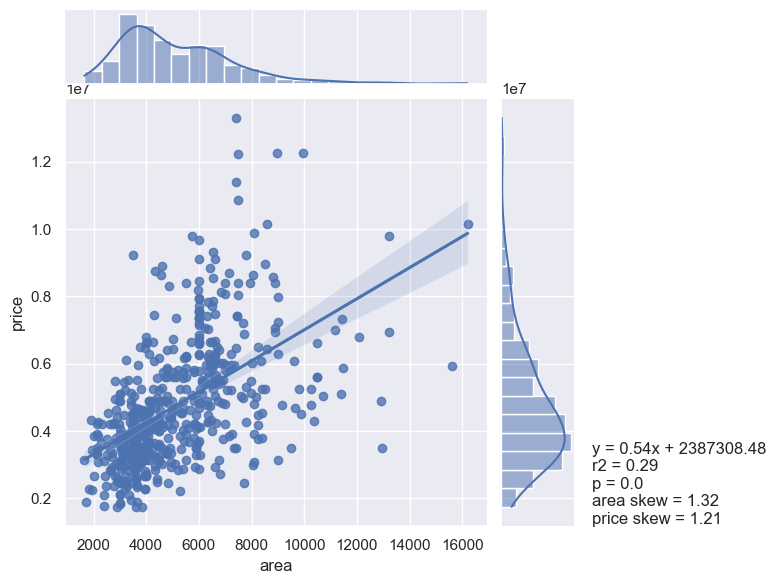

In [33]:
## Looking for skewness, kurtosis and hetoeraticity 

def scatter(feature, label):
    
    m,b,r,p,err = stats.linregress(feature, label)
    
    textstr = f"y = {str(round(r, 2))}x + {str(round(b,2))}\n"
    textstr += f"r2 = {str(round(r**2, 2))} \n"
    textstr += f"p = {str(round(p,3))}\n"
    textstr += f"{str(feature.name)} skew = {str(round(feature.skew(), 2))}\n"
    textstr += f"{str(label.name)} skew = {str(round(label.skew(), 2))}"
    
    sns.set(color_codes=True)
    ax = sns.jointplot(x=feature, y=label, data=df, kind="reg")
    ax.fig.text(1,0.114, textstr, fontsize=12, transform=plt.gcf().transFigure)

scatter(df["area"], df["price"])